The shape of image is: (400, 400, 1) or (400, 400)
[[[167]
  [180]
  [194]
  ...
  [ 64]
  [ 50]
  [ 72]]

 [[161]
  [171]
  [184]
  ...
  [ 77]
  [ 77]
  [ 88]]

 [[163]
  [170]
  [178]
  ...
  [ 82]
  [ 95]
  [ 94]]

 ...

 [[105]
  [112]
  [122]
  ...
  [102]
  [105]
  [105]]

 [[114]
  [114]
  [126]
  ...
  [103]
  [104]
  [104]]

 [[115]
  [116]
  [119]
  ...
  [103]
  [103]
  [103]]]
New shape after Transpose: (400, 400)
[[167 161 163 ... 105 114 115]
 [180 171 170 ... 112 114 116]
 [194 184 178 ... 122 126 119]
 ...
 [ 64  77  82 ... 102 103 103]
 [ 50  77  95 ... 105 104 103]
 [ 72  88  94 ... 105 104 103]]


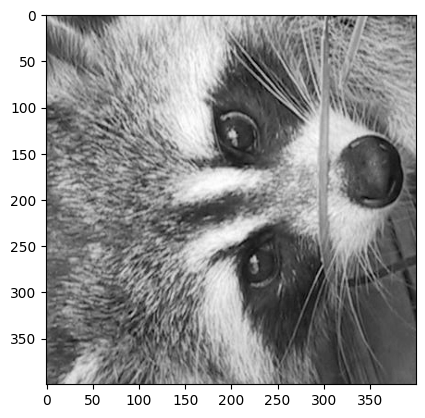

In [1]:
from load_image import ft_load
import matplotlib.pyplot as plt
import numpy as np

def zoom(img_arr: np.ndarray, zoom: int | float, starting_xy: tuple = (0, 0)) -> list:
    """
    @param img_arr: numpy.ndarray
    @param zoom: int | float
    @param starting_xy: tuple
    @return: list

    This function takes an image array and zooms in on a specific area of the image. The function takes the image array
    """
    try:
        if img_arr is None:
            raise TypeError
        if not isinstance(img_arr, np.ndarray):
            raise TypeError
        if not isinstance(zoom, (int, float)):
            raise TypeError
        if not isinstance(starting_xy, tuple):
            raise TypeError
        if not all([isinstance(x, int) for x in starting_xy]):
            raise TypeError
        if not all([x >= 0 for x in starting_xy]):
            raise ValueError
        if zoom < 1:
            raise ValueError
        if len(img_arr.shape) != 3:
            raise ValueError
        height, width, _ = img_arr.shape
        new_dimension = min(height, width)
        new_height = int(new_dimension / zoom)
        new_width = int(new_dimension / zoom)
        left, upper = starting_xy
        right = left + new_width
        lower = upper + new_height
        if right > width or lower > height:
            raise AssertionError("Error: zoomed area is out of bounds")
        zoomed_img = img_arr[upper:lower, left:right, 0:1]
        print(f"The shape of image is: {zoomed_img.shape} or ({zoomed_img.shape[0]}, {zoomed_img.shape[1]})")
        return zoomed_img
    except ValueError:
        print("Error: invalid input value")
        return None
    except TypeError:
        print("Error: invalid input type")
        return None

def transpose(img_arr : np.ndarray) -> np.ndarray:
    """
    @param img_arr: np.ndarray
    @return: np.ndarray

    This function takes an image array and transposes it
    """
    try:
        if img_arr is None:
            raise TypeError
        if not isinstance(img_arr, np.ndarray):
            raise TypeError
        if len(img_arr.shape) != 3:
            raise ValueError
        res = [[img_arr[j][i] for j in range(len(img_arr))] for i in range(len(img_arr[0]))]
        res = np.array(res)
        print(f"New shape after Transpose: {res.shape[0], res.shape[1]}")
        return res
    except ValueError:
        print("Error: invalid input value")
        return None

def main():
    try:
        img_arr = ft_load('animal.jpeg')
        zoomed_img_arr = zoom(img_arr, 1.92, (450, 100))
        print(zoomed_img_arr)
        transposed_img = transpose(zoomed_img_arr)
        if transposed_img is None:
            return
        print(transposed_img[0:400,0:400,0])
        plt.imshow(transposed_img, cmap='gray')
        plt.show()
    except KeyboardInterrupt:
        plt.close()
    except Exception as e:
        print(e)

if __name__ == "__main__":
    main()